In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
df = pd.read_csv(r"C:\Users\VISHAL SSN\deeplearning\DL\EX1\Housing.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

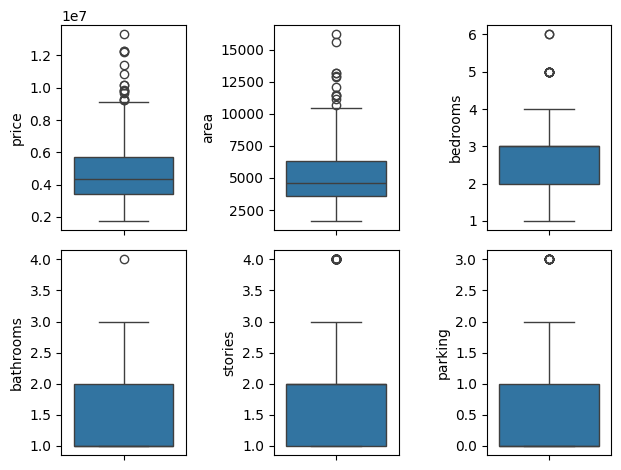

In [8]:
numerical_cols = df.select_dtypes(include="number").columns

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df[col])
plt.tight_layout()
plt.show()

In [10]:
for col in ['price','area']:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        iqr=q3-q1
        lb=q1-1.5*iqr
        ub=q3+1.5*iqr
        df=df[(df[col]>=lb)&(df[col]<=ub)]


In [11]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


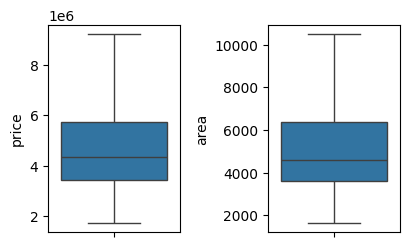

In [9]:
for i, col in enumerate(col_outliers, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(df[col])
plt.tight_layout()
plt.show()

In [10]:
categorical_columns = df.select_dtypes(include="object").columns.tolist()
df_encoded = df.copy()

for col in categorical_columns:
  dic = {}
  unique_values = df[col].unique()
  value = 0
  for unique in unique_values:
    dic[unique] = value
    value += 1
  df_encoded[col] = df_encoded[col].map(dic)

In [11]:
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9205000.0,7420.0,4,2,3,0,0,0,0,0,2,0,0
1,9205000.0,8960.0,4,4,4,0,0,0,0,0,3,1,0
2,9205000.0,9960.0,3,2,2,0,0,1,0,1,2,0,1
3,9205000.0,7500.0,4,2,2,0,0,1,0,0,3,0,0
4,9205000.0,7420.0,4,1,2,0,1,1,0,0,2,1,0


<Axes: >

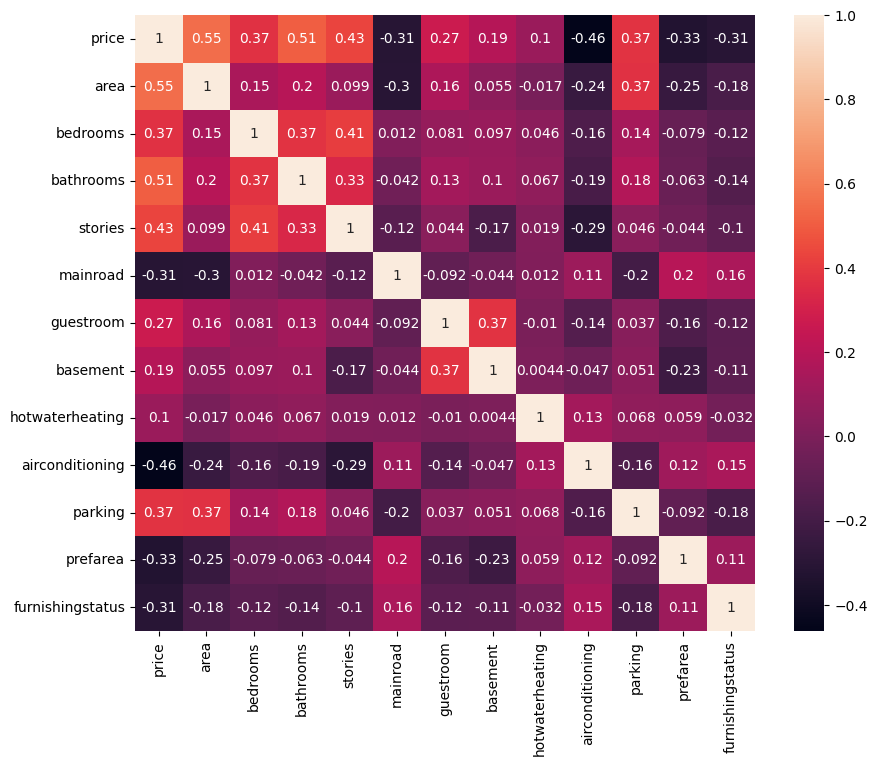

In [12]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features = ["area", "bathrooms", "stories"]
x = df[features]
y = df["price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)

y_predict = model.predict(x_test)

print("MSE: ", mean_squared_error(y_test, y_predict))

MSE:  1931264066166.6777


<Axes: xlabel='area', ylabel='price'>

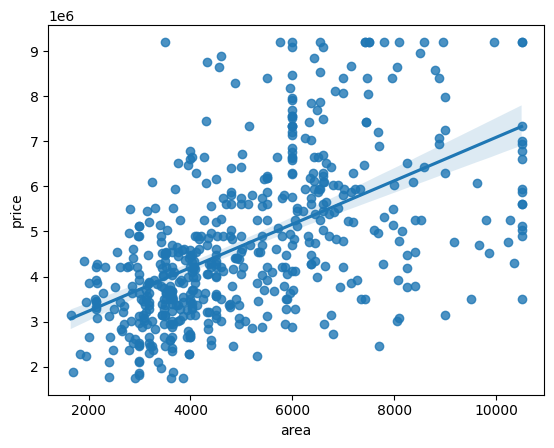

In [14]:
sns.regplot(x='area', y='price', data=df)